<a href="https://colab.research.google.com/github/arqPy/Instala-es_El-tricas/blob/main/grafo_instala%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalações Elétricas

- ler dados da arquitetura:


> Cômodo com suas respectivas dimensões


![](https://github.com/arqPy/Instala-es_El-tricas/blob/main/fig/pequenaPlanta.png?raw=true)

> Calcular potência de iluminação e número mínimo de TUG's



- Inserir todas as cargas da instalação









In [ ]:
class electricLoad: # Vertices do Grafo
  def __init__(self, pot, comodo, circ= 0, x=0, y=0, z=0):
    self.Pot = pot
    self.comodo = comodo
    self.Circ = circ
    #self.QD = 0
    self.x = x
    self.y = y
    self.z = z

  def potencia(self):
    return self.Pot

  def Comodo(self):
    return self.comodo

  def setCirc(self, idCirc):
    self.Circirc = idCirc

  def getCirc(self):
    return self.Circ

  '''
  def setQD(self, idQD):
    self.QD = idQD

  def getQD(self):
    return self.QD

  '''

class lamp(electricLoad):
  def __init__(self, pot, comodo):
    super().__init__(pot, comodo)

  def potencia(self):
    return self.Pot

  def Comodo(self):
    return self.comodo

class QD(electricLoad):
  def __init__(self, pot, comodo):
    super().__init__(pot, comodo)
    self.Circuitos = {}
    self.Tensao = 220

  def idCircuitos(self):
    return self.Circuitos.keys()

  def potencia(self): # potencia total do quadro de distribuicao
    return self.Pot

  def listCircuits(self, id): # de um dado circuito
    return self.Circuitos[id]

  def createCircuito(self, idCirc, lLoadsCirc, dictLoads, Smin=2.5):
      pCirc = 0
      for idload in lLoadsCirc:
        L = dictLoads[idload]
        if (L.getCirc() == 0):
          pCirc = pCirc + L.potencia()
          L.setCirc(idCirc)

      C = Circuito(idCirc, lLoadsCirc, pCirc, Smin)
      self.Circuitos[idCirc] = C

  def Comodo(self):
    return self.comodo


class TUE(electricLoad):
  def __init__(self, pot, comodo):
    super().__init__(pot, comodo)

  def potencia(self):
    return self.Pot

  def Comodo(self):
    return self.comodo

class electricOutlet(electricLoad):
  def __init__(self, pot, comodo):
    super().__init__(pot, comodo)

  def potencia(self):
    return self.Pot

  def Comodo(self):
    return self.comodo

In [ ]:
class Circuito:
  def __init__(self, idCirc, loadsCirc, potCirc, Smin=2.5):
    self.loads = loadsCirc
    self.idCirc = idCirc
    #self.Tensao = Tensao
    self.potCirc = potCirc
    self.Smin = Smin

  def potCircuit(self):
    return self.potCirc

  def setPotCircuit(self, pot):
    self.potCirc = pot

  def setLoadsCircuit(self, loadsCirc):
    self.loads = loadsCirc

  def listLoadsCircuit(self):
    return self.loads

class graphInstallation:  #Conjunto de Vertices e Arcos
  def __init__(self, arquitetura):
    self.arquitetura = arquitetura
    self.Loads = {} # dicionário para referenciar diretamente cada carga - VERTICES
    self.QDs = {} # pode criar um dicionario de QDs {}. Considerando apenas UM
    #self.Circuitos = {}
    self.TA = 'M1'
    self.Pinst = 0
    self.__addLoad()

  def __potIlum(self, comodo, area):
    p = 100
    if area < 6:
      return p
    d = (area - 6) // 4
    return p + d*60

  def createQD(self, idQD):
    qd = QD(self.Pinst, "Residencia")
    self.QDs[idQD] = qd
    self.Loads["QD"+ str(idQD)] = qd

  def getQDs(self):
    return self.QDs

  def __qtdTug(self, comodo, area, per):
    q100, q600 = 1, 0

    if (comodo == 'Banheiro'):
      q100, q600 = 0, 1

    if (comodo == 'Sala') or (comodo == 'Quarto'):
      q100 = int(1 + per // 5)

    if ((comodo == 'Área de Serviço') or (comodo == 'Cozinha')):
      q600 = int(1 + per // 3.5)
      q100 = 0 # pode retirar?
      if q600 > 2:
        q100 = q600 - 3
        q600 = 3
    return (q100, q600)

  def listLoads(self):
    return self.Loads


  def addTUEs(self, listTues):
    ids = listTues.keys()
    k = 0
    for id in ids:
      E = TUE(listTues[id]['Pot'], listTues[id]['Comodo'])
      k= k + 1
      key = "E" + str(k)
      #print(id, key, Pot)
      self.Loads[key] = E

  def __addLoad(self):
    ids = self.arquitetura.keys()
    k = 0
    for id in ids:
      ele = self.arquitetura[id]
      area= ele['C']*ele['L']
      per = 2*(ele['C'] + ele['L'])

      Pot = self.__potIlum(id, area) # Potencia de Iluminação
      L = lamp(Pot, id)
      k= k + 1
      key = "L" + str(k)
      #print(id, key, Pot)
      self.Loads[key] = L

      (qTUG100, qTUG600) = self.__qtdTug(id, area, per)

      for i in range(qTUG100):
        R = electricOutlet(100, id)
        k= k + 1
        key = "R" + str(k)
        self.Loads[key] = R

      for i in range(qTUG600):
        R = electricOutlet(600, id)
        k= k + 1
        key = "R" + str(k)
        self.Loads[key] = R

  def potenciaInstalada(self):
      loads = self.Loads
      ids = loads.keys()
      pIlum, pTug, pTue = 0, 0, 0
      for id in ids:
        l = loads[id]
        pot = l.potencia()
        if id[0:1]== 'L':
          pIlum = pIlum + pot
        elif id[0:1]== 'R':
          pTug = pTug + pot*0.8 # fator de potencia das TUGs
        elif id[0:1]== 'E':
          pTue = pTue + pot
      Pinst = pIlum + pTug + pTue
      TA = 'M1'
      if ((Pinst > 15000)and (Pinst < 22000)):
        TA = 'B2'
      if ((Pinst > 11000)and (Pinst < 15000)):
        TA = 'B1'
      if ((Pinst > 8000)and (Pinst < 11000)):
        TA = 'M2'
      if (Pinst > 22000):
        TA = 'T'
      self.Pinst = Pinst
      self.TA = TA
      return (Pinst, TA)


In [ ]:
# import urllib library
from urllib.request import urlopen

# import json
import json
# store the URL in url as
# parameter for urlopen
url = "https://raw.githubusercontent.com/arqPy/Instala-es_El-tricas/main/arquitetura02.json"
# https://github.com/arqPy/Instala-es_El-tricas/blob/main/arquitetura02.json
# store the response of URL
response = urlopen(url)

# storing the JSON response
# from url in data
data_json = json.loads(response.read())

# print the json response
print(data_json)

[{'Comodo': 'Área de Serviço', 'Dimensões': {'C': 1.5, 'L': 1.5}}, {'Comodo': 'Quarto', 'Dimensões': {'C': 2.5, 'L': 3.5}}, {'Comodo': 'Sala', 'Dimensões': {'C': 3, 'L': 4.15}}, {'Comodo': 'Cozinha', 'Dimensões': {'C': 1.5, 'L': 3.5}}, {'Comodo': 'Banheiro', 'Dimensões': {'C': 1.5, 'L': 3.5}}]


In [ ]:
arquitetura = {}
for item in data_json:
  key = item['Comodo']
  value = item['Dimensões']
  arquitetura[key] = value
arquitetura

{'Área de Serviço': {'C': 1.5, 'L': 1.5},
 'Quarto': {'C': 2.5, 'L': 3.5},
 'Sala': {'C': 3, 'L': 4.15},
 'Cozinha': {'C': 1.5, 'L': 3.5},
 'Banheiro': {'C': 1.5, 'L': 3.5}}

In [ ]:
tues = {
    'Chuveiro_B1':{'Pot':6500,"Comodo": 'Banheiro'}
}

In [ ]:
projInst = graphInstallation(arquitetura)
projInst.addTUEs(tues)

In [ ]:
print(projInst.potenciaInstalada())
projInst.createQD(1)
projInst.getQDs()

(10420.0, 'M2')


{1: <__main__.QD at 0x7e4d45bdf820>}

In [ ]:
qd = projInst.getQDs()[1]
qd.potencia()

10420.0

In [ ]:
loads = projInst.listLoads()
for lo in loads.keys():
  print(lo) # , loads[lo].potencia(), loads[lo].Comodo()

L1
R2
R3
L4
R5
R6
R7
L8
R9
R10
R11
L12
R13
R14
R15
L16
R17
E1
QD1


In [ ]:
qd.createCircuito(1, ['R13', 'R14', 'R15'], loads)

In [ ]:
C = qd.listCircuits(1)
print(C.listLoadsCircuit())
print(C.potCircuit())
#qd.createCircuito(1, )

['R13', 'R14', 'R15']
1800


In [ ]:
# identificacao de circuitos
qd.idCircuitos()

dict_keys([1])

![](https://github.com/arqPy/Instala-es_El-tricas/blob/main/fig/divisao_circuitos.jpeg?raw=true)

![](https://github.com/arqPy/Instala-es_El-tricas/blob/main/fig/dimensiona1.jpeg?raw=true)

In [ ]:
1800/(220*1*0.577)

14.179927524814874

In [ ]:
import pandas as pd


In [ ]:
dt = pd.read_csv("https://raw.githubusercontent.com/arqPy/Instala-es_El-tricas/main/IE-Tabela36.csv", sep=',', index_col="S", usecols=["S", "B1-2", "B1-3", "B2-2", "B2-3"] )
dt


,B1-2,B1-3,B2-2,B2-3
S,,,,
0.50,9.0,8.0,9.0,8
0.75,11.0,10.0,11.0,10
1.00,14.0,12.0,13.0,12
1.50,17.5,15.5,16.5,15
2.50,24.0,21.0,23.0,20
4.00,32.0,28.0,30.0,27
6.00,41.0,36.0,38.0,34
10.00,57.0,50.0,52.0,46
16.00,76.0,68.0,69.0,62


In [ ]:
lista = list(dt.index)
lista = [x for x in lista if x >= 2.5 and x < 100]
lista

[2.5, 4.0, 6.0, 10.0, 16.0, 25.0, 35.0, 50.0, 70.0, 95.0]

In [ ]:
# Capacidade de cabo
s = 1.5
print("Cabo de %f : %f" %(s, dt.loc[s, 'B1-2']))
s = 2.5
print("Cabo de %f : %f" %(s, dt.loc[s, 'B1-2']))

Cabo de 1.500000 : 17.500000
Cabo de 2.500000 : 24.000000


In [ ]:
# determinar a seção devido a capacidade de corrente do circuito 7
'''
Dados: Icorrig = 29.55 e Método B1-2
'''
Icor = 29.5
S = 0.5
for s in dt.index:
  if (dt.loc[s, 'B1-2'] >= Icor):
    S = s
    break
print(S)


4.0


In [ ]:
dt.index

Float64Index([   0.5,   0.75,    1.0,    1.5,    2.5,    4.0,    6.0,   10.0,
                16.0,   25.0,   35.0,   50.0,   70.0,   95.0,  120.0,  150.0,
               185.0,  240.0,  300.0,  400.0,  500.0,  630.0,  800.0, 1000.0],
             dtype='float64', name='S')

![](https://github.com/arqPy/Instala-es_El-tricas/blob/main/fig/Instalacao_full.jpeg?raw=true)



![](https://github.com/arqPy/Instala-es_El-tricas/blob/main/fig/dimensiona2.jpeg?raw=true)

In [ ]:
from urllib.request import urlopen

import json

url = "https://raw.githubusercontent.com/arqPy/Instala-es_El-tricas/main/eletrodutos.json"

response = urlopen(url)

data_json = json.loads(response.read())

print(data_json)

[{'Trecho Eletroduto': 'T01', 'Cargas': {'NP': 'QD1', 'NC': 'L12', 'Comprimento': 3}}, {'Trecho Eletroduto': 'T02', 'Cargas': {'NP': 'L12', 'NC': 'R15', 'Comprimento': 2}}, {'Trecho Eletroduto': 'T03', 'Cargas': {'NP': 'L12', 'NC': 'L1', 'Comprimento': 2}}]


In [ ]:
trechos = {}
for item in data_json:
  key = item['Trecho Eletroduto']
  value = item['Cargas']
  trechos[key] = value
trechos

{'T01': {'NP': 'QD1', 'NC': 'L12', 'Comprimento': 3},
 'T02': {'NP': 'L12', 'NC': 'R15', 'Comprimento': 2},
 'T03': {'NP': 'L12', 'NC': 'L1', 'Comprimento': 2}}

In [ ]:
trechos['T01']['NP']

'QD1'

In [ ]:
# queda de tensao
ro_Cobre = 1/56
d = 20
Icorr = 14.17
deltaV = 4/100
V = 220
S = (2*ro_Cobre*d*Icorr)/(deltaV*V)
S

1.1501623376623373

In [ ]:
import networkx as nx

In [ ]:
posicoes_vertices = {
  'L1':[0.8, 4.8],
  'L4':[1.8, 1.3],
  'R5':[0.8, 0.8],
  'R6':[3, 0.8],
  'R7':[0.5, 1.5],
  'L8':[3.3, 2],
  'L12':[2.3, 4.8],
  'L16':[1.8, 2.7]
                     }

In [ ]:
'''posicoes_vertices = {0:[3, 0], 1:[1, 3], 2:[4, 3], 3:[2, 0]}
posicoes_vertices = {
  'L1':[1.8, 1.3],
  'R3':[1.8, 1.3],
  'L4':[1.8, 1.3],
  'R5':[1.8, 1.3],
  'R6':[1.8, 1.3],
  'R7':[1.8, 1.3],
  'L8':[1.8, 1.3],
  'R9':[1.8, 1.3],
  'R10':[1.8, 1.3],
  'R11':[1.8, 1.3],
  'L12':[1.8, 1.3],
  'R13':[1.8, 1.3],
  'R14':[1.8, 1.3],
  'R15':[1.8, 1.3],
  'L16':[1.8, 1.3],
  'R17':[1.8, 1.3],
  'E1':[1.8, 1.3],
  'QD1':[1.8, 1.3]
'''
nos = list(posicoes_vertices.keys())
nos


['L1', 'L4', 'R5', 'R6', 'R7', 'L8', 'L12', 'L16']

In [ ]:
G = nx.DiGraph()

In [ ]:
G.add_edges_from([("L1", "L12"), ("L4", "R5")])
G.add_nodes_from(nos)

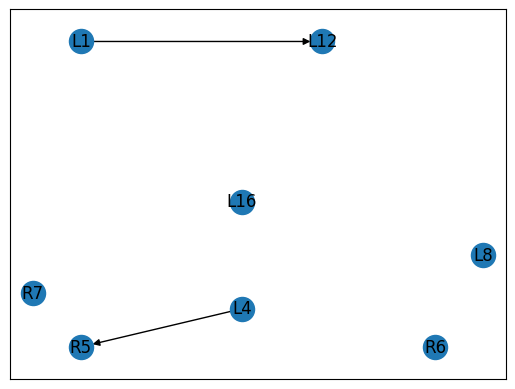

In [ ]:
nx.draw_networkx(G, posicoes_vertices)

https://towardsdatascience.com/graph-visualisation-basics-with-python-part-ii-directed-graph-with-networkx-5c1cd5564daa